# Zaid Hani Allwansah

## Import Libararies

In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd

## Read the data

In [2]:
df = pd.read_parquet('green_tripdata_2023-10.parquet')
display(df.head())
csv = pd.read_csv('taxi+_zone_lookup.csv')
csv.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-10-01 00:57:33,2023-10-01 01:07:58,N,1.0,166,74,1.0,1.45,12.1,1.0,0.5,2.92,0.0,NaN,1.0,17.52,1.0,1.0,0.00
1,2,2023-10-01 01:00:16,2023-10-01 01:06:13,N,1.0,74,42,1.0,0.89,7.9,1.0,0.5,0.00,0.0,NaN,1.0,10.40,2.0,1.0,0.00
2,2,2023-10-01 00:51:52,2023-10-01 01:00:32,N,1.0,83,129,1.0,2.38,13.5,1.0,0.5,0.00,0.0,NaN,1.0,16.00,2.0,1.0,0.00
3,2,2023-10-01 00:03:39,2023-10-01 00:11:20,N,1.0,74,263,1.0,2.26,11.4,1.0,0.5,3.33,0.0,NaN,1.0,19.98,1.0,1.0,2.75
4,2,2023-10-01 00:27:42,2023-10-01 00:39:10,N,1.0,74,236,1.0,2.14,13.5,1.0,0.5,2.81,0.0,NaN,1.0,21.56,1.0,1.0,2.75


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


## merging and joining

In [37]:
# making a pickup location dataframe
pu = csv.merge(df, left_on='LocationID', right_on= 'PULocationID')
# -----------------temporary code-----------------
# pu = pu[['PULocationID', 'Borough', 'Zone', 'service_zone', 'DOLocationID']]
# ------------------------------------------------

# renaming the columns in the pu dataframe
pu = pu.rename(
    {
     'PULocationID':'pickup_location_id',
     'Borough':'pickup_borough',
     'Zone': 'pickup_zone',
     'service_zone':'pickup_service_zone',
     'DOLocationID':'dropout_location_id'
    },
    axis=1)

# merging the pu dataframe with the csv dataframe that contains the data about the locations one more time
# but this time it's on the 'dropout_location_id' columns
merged = pu.merge(csv, left_on='dropout_location_id', right_on='LocationID')
merged = merged.rename(
    {
        'Borough':'dropout_borough',
        'Zone': 'dropout_zone',
        'service_zone':'dropout_service_zone'
    },
    axis=1)
# -----------------temporary code-----------------
# graph_df = merged.drop('LocationID', axis=1)
# graph_df
# ------------------------------------------------
graph_df = merged.drop(['LocationID_y', 'LocationID_x'], axis=1)
graph_df = graph_df.sort_values('lpep_pickup_datetime', ignore_index=True)
graph_df

,pickup_borough,pickup_zone,pickup_service_zone,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,pickup_location_id,dropout_location_id,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,dropout_borough,dropout_zone,dropout_service_zone
0,Queens,Jackson Heights,Boro Zone,2,2023-09-30 22:04:29,2023-09-30 22:06:50,N,1.0,129,129,...,0.0,NaN,1.0,6.90,2.0,1.0,0.0,Queens,Jackson Heights,Boro Zone
1,Queens,Jackson Heights,Boro Zone,2,2023-09-30 22:24:19,2023-09-30 22:36:04,N,1.0,129,179,...,0.0,NaN,1.0,19.50,2.0,1.0,0.0,Queens,Old Astoria,Boro Zone
2,Queens,Jackson Heights,Boro Zone,2,2023-09-30 22:35:08,2023-09-30 22:40:34,N,1.0,129,129,...,0.0,NaN,1.0,9.70,2.0,1.0,0.0,Queens,Jackson Heights,Boro Zone
3,Queens,Woodside,Boro Zone,2,2023-09-30 23:01:31,2023-10-01 22:08:48,N,1.0,260,260,...,0.0,NaN,1.0,11.90,1.0,1.0,0.0,Queens,Woodside,Boro Zone
4,Queens,Jackson Heights,Boro Zone,2,2023-09-30 23:54:58,2023-10-01 00:01:20,N,1.0,129,129,...,0.0,NaN,1.0,11.40,1.0,1.0,0.0,Queens,Jackson Heights,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66172,Queens,Elmhurst/Maspeth,Boro Zone,2,2023-10-31 23:55:41,2023-11-01 00:05:07,N,1.0,83,260,...,0.0,NaN,1.0,16.68,1.0,1.0,0.0,Queens,Woodside,Boro Zone
66173,Manhattan,East Harlem South,Boro Zone,2,2023-10-31 23:56:12,2023-11-01 00:03:22,N,1.0,75,74,...,0.0,NaN,1.0,9.70,2.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone
66174,Queens,Maspeth,Boro Zone,1,2023-10-31 23:57:33,2023-11-01 00:18:53,N,1.0,157,49,...,0.0,NaN,1.0,24.20,1.0,1.0,0.0,Brooklyn,Clinton Hill,Boro Zone
66175,Manhattan,Washington Heights South,Boro Zone,2,2023-10-31 23:58:00,2023-11-01 00:09:00,None,NaN,244,243,...,0.0,NaN,1.0,15.53,NaN,NaN,NaN,Manhattan,Washington Heights North,Boro Zone


## build a graph

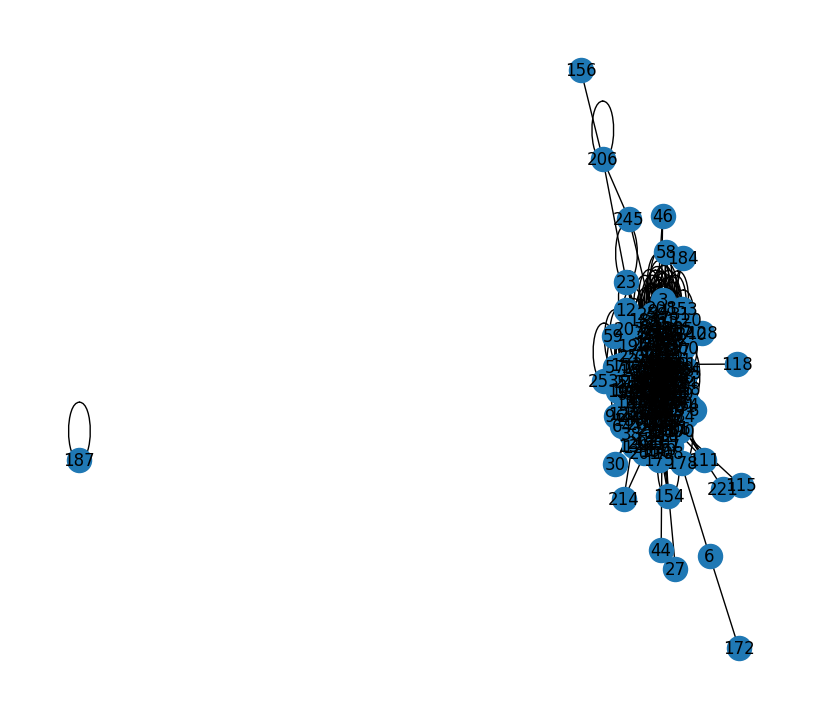

In [20]:
g = nx.Graph()
plt.figure(figsize=(8,7))
g = nx.from_pandas_edgelist(graph_df, source='pickup_location_id', target='dropout_location_id')
nx.draw(g, with_labels=True)

In [90]:
graph_df[(graph_df['pickup_location_id']==187) | (graph_df['dropout_location_id']==187)]

,pickup_location_id,pickup_borough,pickup_zone,pickup_service_zone,dropout_location_id,dropout_borough,dropout_zone,dropout_service_zone
66162,187,Staten Island,Port Richmond,Boro Zone,187,Staten Island,Port Richmond,Boro Zone


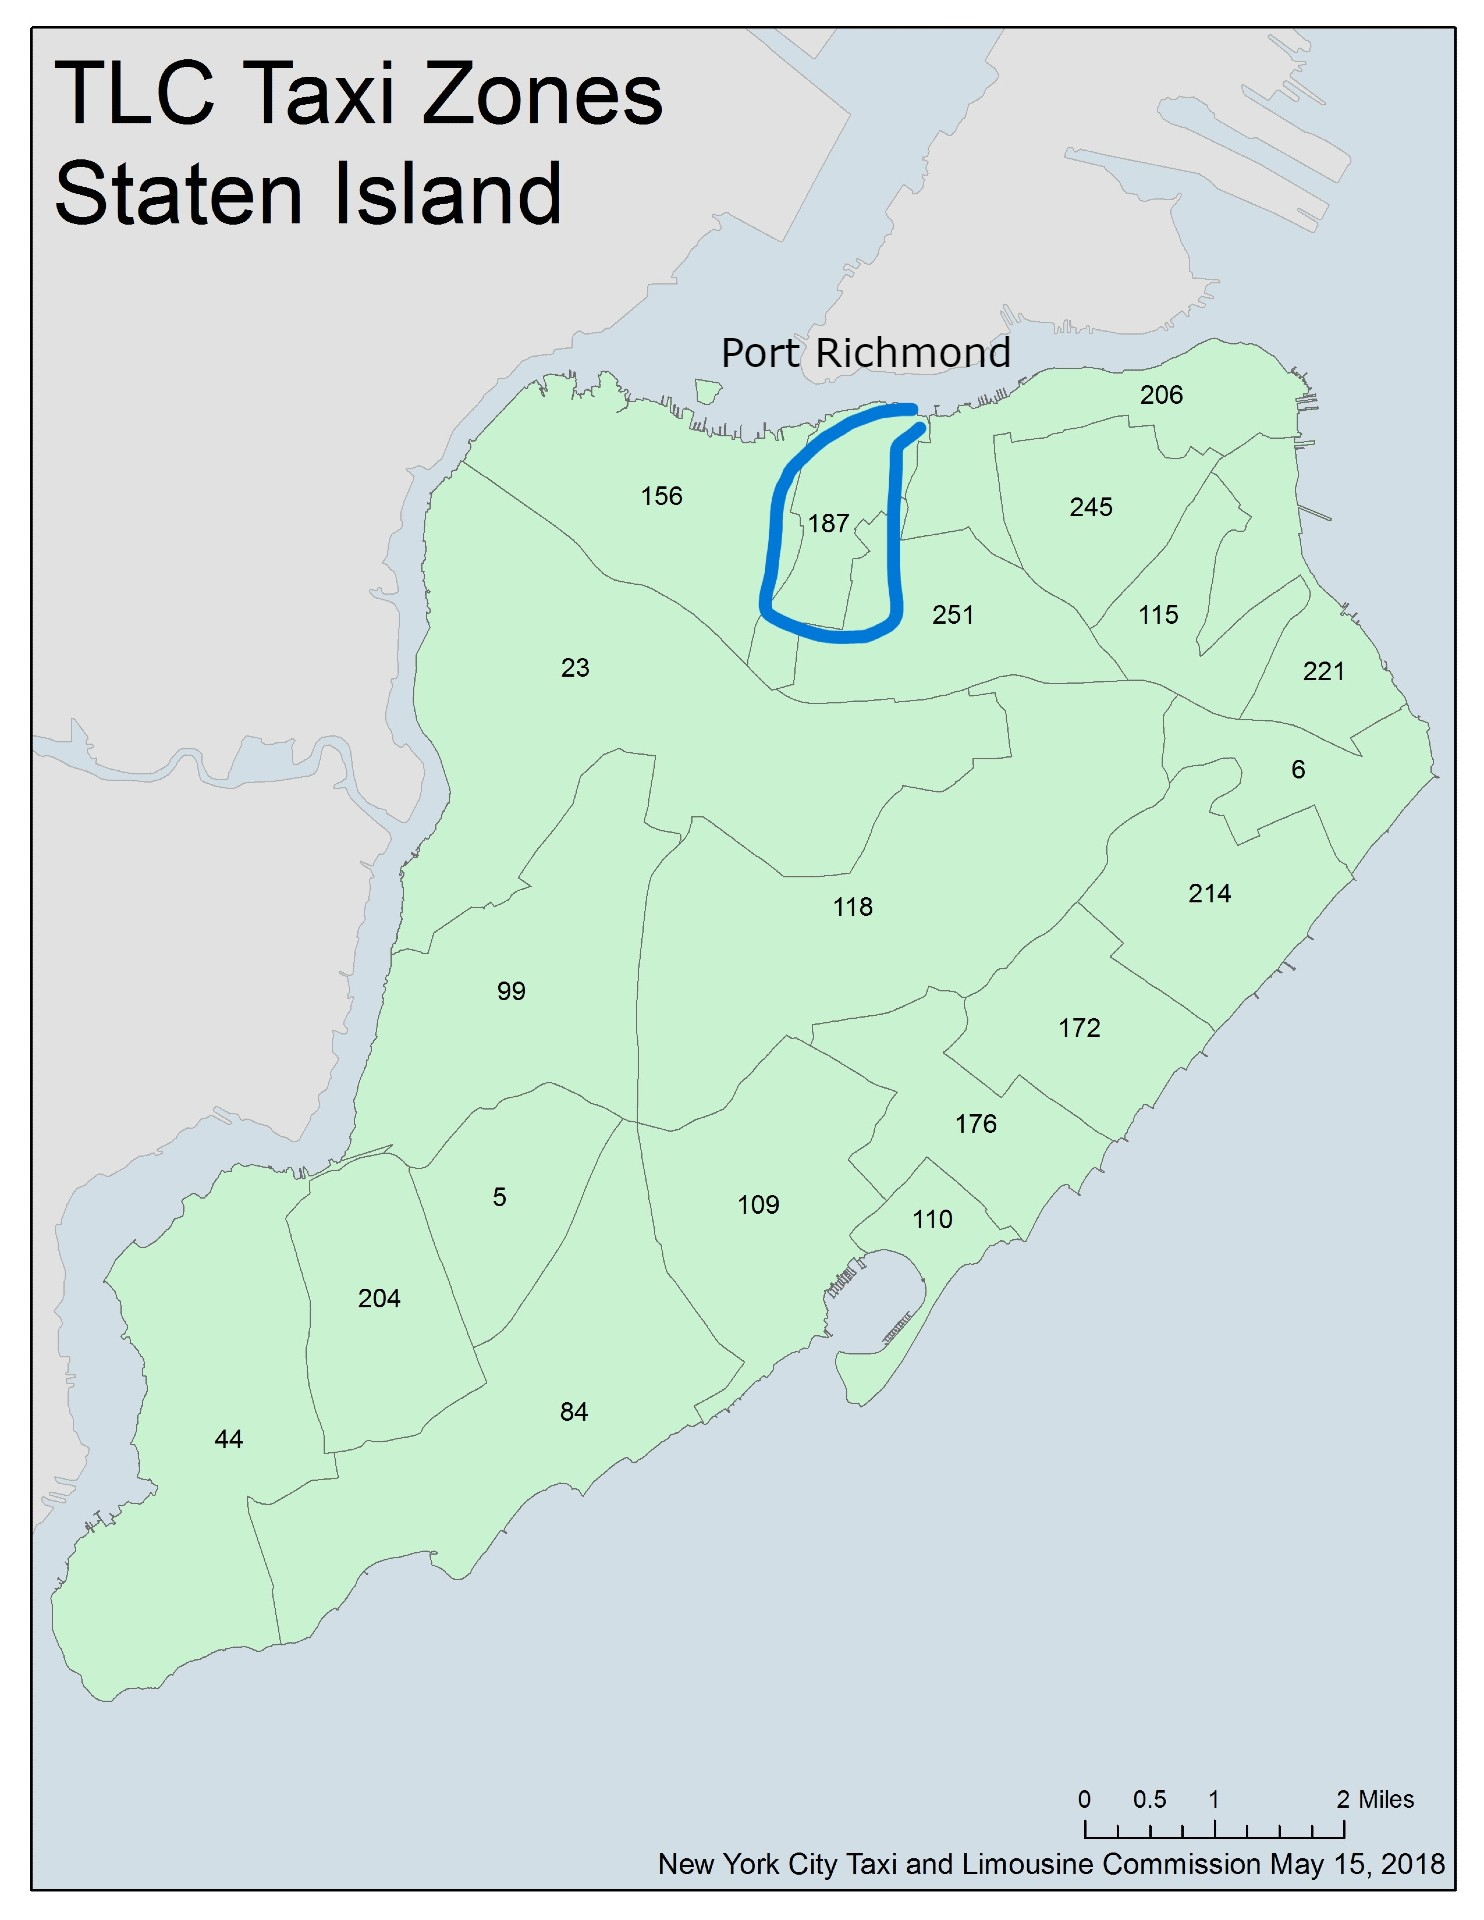

#### as you can see this is a self colsed node and the taxi trips that are happening in this area is only enclosed to it, meaning that this is not a very popular zone for people to drop in